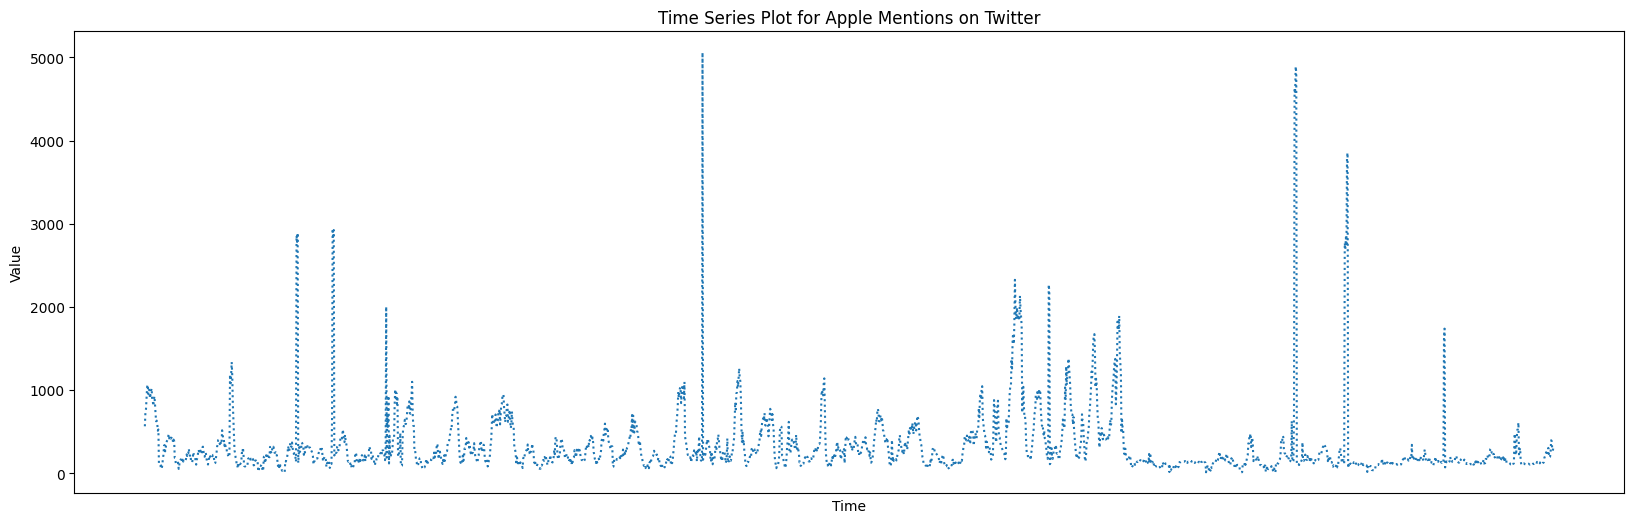

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

pat=r'TravelTime_387.csv'

aapl_ts=pd.read_csv(pat)

plt.figure(figsize=(20, 6))
plt.plot(aapl_ts['timestamp'], aapl_ts['value'], linestyle='dotted')
plt.title('Time Series Plot for Apple Mentions on Twitter')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks([]) #removing time label

plt.savefig('Time_Series_Images/aapl_ts.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [9]:
aapl_ts.head()

,timestamp,value
0,2015-07-10 14:24:00,564
1,2015-07-10 14:38:00,730
2,2015-07-10 14:48:00,770
3,2015-07-10 15:03:00,910
4,2015-07-10 15:22:00,1035


        [
            "2015-07-27 10:56:00.000000",
            "2015-07-31 18:01:00.000000"
        ],
        [
            "2015-08-17 11:51:00.000000",
            "2015-08-20 01:54:00.000000"
        ],
        [
            "2015-08-31 15:44:00.000000",
            "2015-09-01 13:06:00.000000"
        ]
    ],

C:\Users\SADEK COMPUTER\AppData\Local\Temp\ipykernel_10716\1280436861.py:17: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(aapl_ts.index, aapl_ts['value'], linestyle='-', marker='', color='blue', label='Tweet Volume', zorder=1)


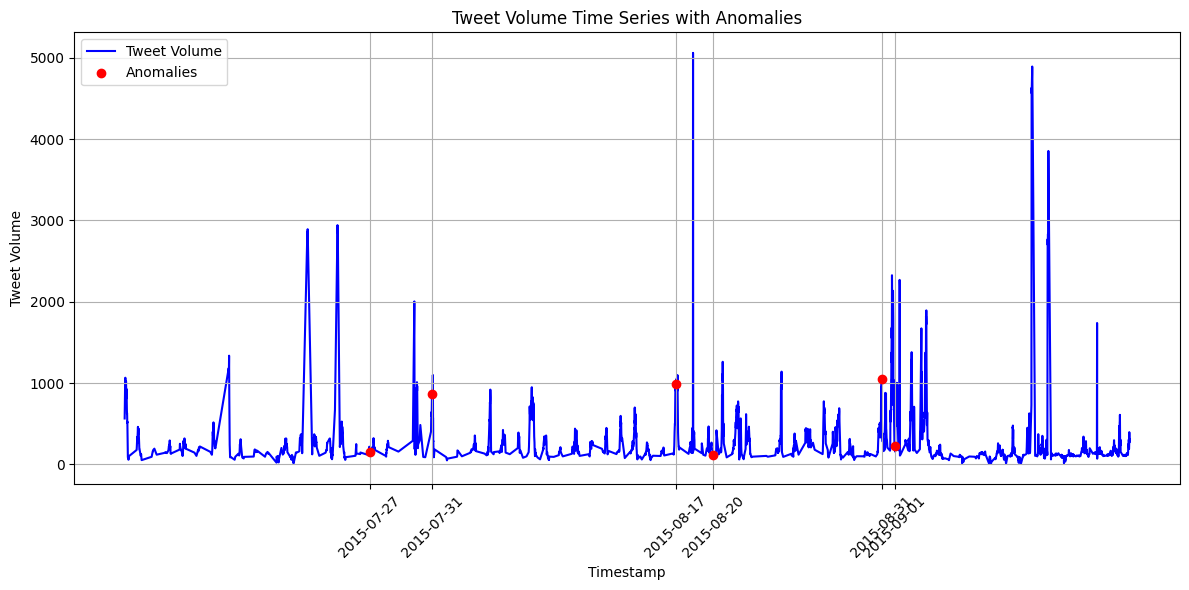

In [10]:
anomaly_index_list= [
    "2015-07-27 10:56:00",
    "2015-07-31 18:01:00",
    "2015-08-17 11:51:00",
    "2015-08-20 01:54:00",
    "2015-08-31 15:44:00",
    "2015-09-01 13:06:00"
]

aapl_ts['timestamp'] = pd.to_datetime(aapl_ts['timestamp'], format='%Y-%m-%d %H:%M:%S')
aapl_ts.set_index('timestamp', inplace=True)


anomaly_index_list = pd.to_datetime(anomaly_index_list)
anomaly_values = aapl_ts.loc[anomaly_index_list, 'value']
plt.figure(figsize=(12, 6))
plt.plot_date(aapl_ts.index, aapl_ts['value'], linestyle='-', marker='', color='blue', label='Tweet Volume', zorder=1)

plt.scatter(anomaly_index_list, anomaly_values, color='red', zorder=2, label='Anomalies')

plt.title('Tweet Volume Time Series with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Tweet Volume')
plt.xticks(anomaly_index_list)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()